In [ ]:
!pip install pyreadr

In [ ]:
import pyreadr
import pandas as pd

result = pyreadr.read_r('acc_walking_IU.rda')
# done! let's see what we got
print(result.keys()) # let's check what objects we got
acc_walking_IU = result["acc_walking_IU"]
acc_walking_IU 

odict_keys(['acc_walking_IU'])


,subj_id,loc_id,time_s,x,y,z
0,id86237981,left_wrist,0.00,-0.270,-0.773,-0.160
1,id86237981,left_wrist,0.01,-0.266,-0.738,-0.172
2,id86237981,left_wrist,0.02,-0.277,-0.707,-0.168
3,id86237981,left_wrist,0.03,-0.277,-0.680,-0.160
4,id86237981,left_wrist,0.04,-0.289,-0.656,-0.160
...,...,...,...,...,...,...
2590443,idff99de96,right_ankle,206.71,0.098,1.059,0.090
2590444,idff99de96,right_ankle,206.72,0.105,1.070,0.074
2590445,idff99de96,right_ankle,206.73,0.125,1.094,0.090
2590446,idff99de96,right_ankle,206.74,0.141,1.129,0.090


In [ ]:
# result = pyreadr.read_r('stride_template.rda')
# print(result.keys())
# stride_template = result

In [ ]:
acc_walking_IU

,subj_id,loc_id,time_s,x,y,z
0,id86237981,left_wrist,0.00,-0.270,-0.773,-0.160
1,id86237981,left_wrist,0.01,-0.266,-0.738,-0.172
2,id86237981,left_wrist,0.02,-0.277,-0.707,-0.168
3,id86237981,left_wrist,0.03,-0.277,-0.680,-0.160
4,id86237981,left_wrist,0.04,-0.289,-0.656,-0.160
...,...,...,...,...,...,...
2590443,idff99de96,right_ankle,206.71,0.098,1.059,0.090
2590444,idff99de96,right_ankle,206.72,0.105,1.070,0.074
2590445,idff99de96,right_ankle,206.73,0.125,1.094,0.090
2590446,idff99de96,right_ankle,206.74,0.141,1.129,0.090


In [ ]:
acc_walking_IU['loc_id'].unique()

array(['left_wrist', 'left_hip', 'left_ankle', 'right_ankle'],
      dtype=object)

In [ ]:
left_wrist_data = acc_walking_IU[acc_walking_IU.loc_id == "left_wrist"]
left_wrist_data

,subj_id,loc_id,time_s,x,y,z
0,id86237981,left_wrist,0.00,-0.270,-0.773,-0.160
1,id86237981,left_wrist,0.01,-0.266,-0.738,-0.172
2,id86237981,left_wrist,0.02,-0.277,-0.707,-0.168
3,id86237981,left_wrist,0.03,-0.277,-0.680,-0.160
4,id86237981,left_wrist,0.04,-0.289,-0.656,-0.160
...,...,...,...,...,...,...
2528415,idff99de96,left_wrist,206.71,0.707,-0.570,0.289
2528416,idff99de96,left_wrist,206.72,0.668,-0.555,0.254
2528417,idff99de96,left_wrist,206.73,0.621,-0.527,0.207
2528418,idff99de96,left_wrist,206.74,0.613,-0.488,0.168


In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.signal import find_peaks
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import numpy as np
left_wrist_data['magnitude'] = np.sqrt(acc_walking_IU['x']**2+acc_walking_IU['y']**2+acc_walking_IU['z']**2)
left_wrist_data

,subj_id,loc_id,time_s,x,y,z,magnitude
0,id86237981,left_wrist,0.00,-0.270,-0.773,-0.160,0.834284
1,id86237981,left_wrist,0.01,-0.266,-0.738,-0.172,0.803109
2,id86237981,left_wrist,0.02,-0.277,-0.707,-0.168,0.777690
3,id86237981,left_wrist,0.03,-0.277,-0.680,-0.160,0.751485
4,id86237981,left_wrist,0.04,-0.289,-0.656,-0.160,0.734477
...,...,...,...,...,...,...,...
2528415,idff99de96,left_wrist,206.71,0.707,-0.570,0.289,0.953032
2528416,idff99de96,left_wrist,206.72,0.668,-0.555,0.254,0.904856
2528417,idff99de96,left_wrist,206.73,0.621,-0.527,0.207,0.840368
2528418,idff99de96,left_wrist,206.74,0.613,-0.488,0.168,0.801335


In [ ]:
left_wrist_data = left_wrist_data.dropna()
left_wrist_data.shape

(647612, 7)

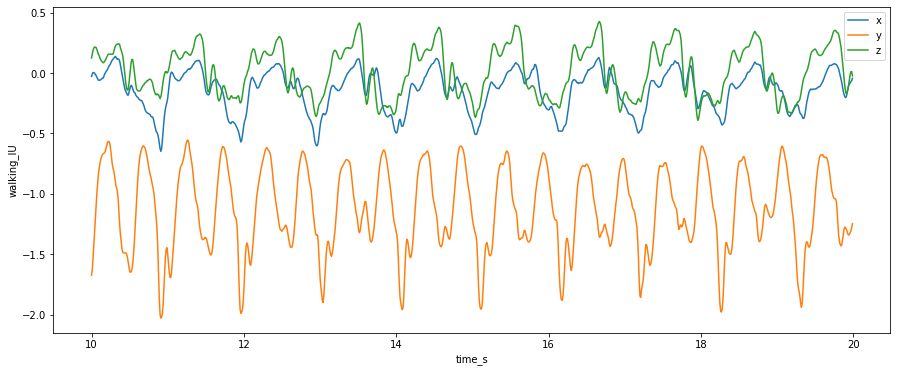

In [ ]:
plt.figure(figsize = (15, 6))
data_36 = left_wrist_data[(left_wrist_data['subj_id'] == 'id86237981') ][1000:2000]
sns.lineplot(y = 'x', x = 'time_s', data = data_36)
sns.lineplot(y = 'y', x = 'time_s', data = data_36)
sns.lineplot(y = 'z', x = 'time_s', data = data_36)
plt.legend(['x', 'y', 'z'])
plt.ylabel('walking_IU')
# plt.title(i, fontsize = 15)
plt.show()

In [ ]:
data_36

,subj_id,loc_id,time_s,x,y,z,magnitude
1000,id86237981,left_wrist,10.00,-0.027,-1.672,0.125,1.676883
1001,id86237981,left_wrist,10.01,-0.008,-1.625,0.156,1.632490
1002,id86237981,left_wrist,10.02,0.004,-1.531,0.188,1.542505
1003,id86237981,left_wrist,10.03,0.004,-1.414,0.207,1.429077
1004,id86237981,left_wrist,10.04,0.000,-1.313,0.215,1.330486
...,...,...,...,...,...,...,...
1995,id86237981,left_wrist,19.95,-0.094,-1.336,-0.055,1.340432
1996,id86237981,left_wrist,19.96,-0.082,-1.320,-0.012,1.322599
1997,id86237981,left_wrist,19.97,-0.070,-1.305,0.012,1.306931
1998,id86237981,left_wrist,19.98,-0.063,-1.281,0.012,1.282604


In [ ]:
len(data_36)

1000

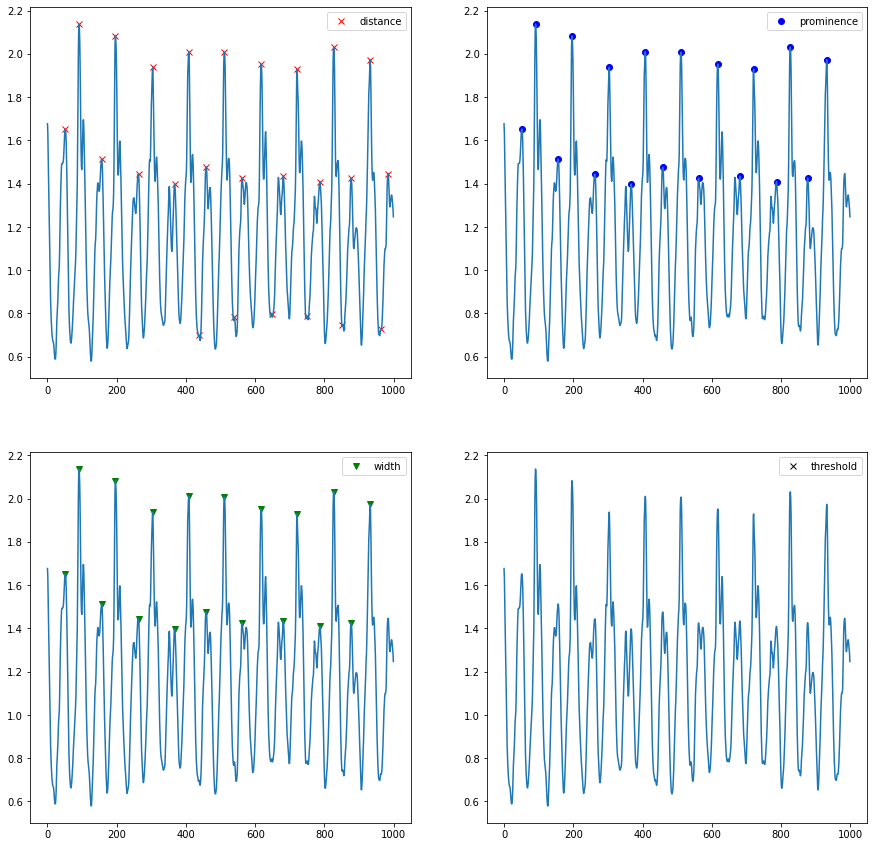

In [ ]:
import numpy as np
import matplotlib.pyplot as plt 
from scipy.signal import find_peaks

f, axs = plt.subplots(2,2,figsize=(15,15))

x = data_36['magnitude'].values
peaks, _ = find_peaks(x, distance=18)
peaks2, _ = find_peaks(x, prominence=0.5)      # BEST!
peaks3, _ = find_peaks(x, width=18)
peaks4, _ = find_peaks(x, threshold=0.4)     # Required vertical distance to its direct neighbouring samples, pretty useless

plt.subplot(2, 2, 1)
plt.plot(peaks, x[peaks], "xr"); plt.plot(x); plt.legend(['distance'])

plt.subplot(2, 2, 2)
plt.plot(peaks2, x[peaks2], "ob"); plt.plot(x); plt.legend(['prominence'])

plt.subplot(2, 2, 3)
plt.plot(peaks3, x[peaks3], "vg"); plt.plot(x); plt.legend(['width'])

plt.subplot(2, 2, 4)
plt.plot(peaks4, x[peaks4], "xk"); plt.plot(x); plt.legend(['threshold'])

plt.show()

In [ ]:
appended_data = []
df = []

for k in left_wrist_data.subj_id.unique():
    data_1 = left_wrist_data[(left_wrist_data['subj_id'] == k) ]

    x = data_1['magnitude'].values

    peaks2, _ = find_peaks(x, prominence=0.5) 
    initial = np.zeros(shape = len(x))

    start = peaks2[0]

    for index,each in enumerate(peaks2):
      
      if(index %2 != 0):
        initial[start:each] = 1
      start = each

    data_1["label"] = initial
    df.append(data_1)

appended_data = pd.concat(df)

appended_data

,subj_id,loc_id,time_s,x,y,z,magnitude,label
0,id86237981,left_wrist,0.00,-0.270,-0.773,-0.160,0.834284,0.0
1,id86237981,left_wrist,0.01,-0.266,-0.738,-0.172,0.803109,0.0
2,id86237981,left_wrist,0.02,-0.277,-0.707,-0.168,0.777690,0.0
3,id86237981,left_wrist,0.03,-0.277,-0.680,-0.160,0.751485,0.0
4,id86237981,left_wrist,0.04,-0.289,-0.656,-0.160,0.734477,0.0
...,...,...,...,...,...,...,...,...
2528415,idff99de96,left_wrist,206.71,0.707,-0.570,0.289,0.953032,0.0
2528416,idff99de96,left_wrist,206.72,0.668,-0.555,0.254,0.904856,0.0
2528417,idff99de96,left_wrist,206.73,0.621,-0.527,0.207,0.840368,0.0
2528418,idff99de96,left_wrist,206.74,0.613,-0.488,0.168,0.801335,0.0


In [ ]:
appended_data[28:50]

,subj_id,loc_id,time_s,x,y,z,magnitude,label
28,id86237981,left_wrist,0.28,-0.188,-1.598,-0.121,1.613564,0.0
29,id86237981,left_wrist,0.29,-0.141,-1.852,-0.082,1.859169,0.0
30,id86237981,left_wrist,0.30,-0.113,-2.020,-0.055,2.023906,0.0
31,id86237981,left_wrist,0.31,-0.102,-2.051,-0.031,2.053769,1.0
32,id86237981,left_wrist,0.32,-0.098,-2.016,0.004,2.018385,1.0
33,id86237981,left_wrist,0.33,-0.117,-1.969,0.047,1.973033,1.0
34,id86237981,left_wrist,0.34,-0.129,-1.914,0.102,1.921052,1.0
35,id86237981,left_wrist,0.35,-0.129,-1.840,0.152,1.850769,1.0
36,id86237981,left_wrist,0.36,-0.129,-1.754,0.188,1.768757,1.0
37,id86237981,left_wrist,0.37,-0.133,-1.660,0.215,1.679141,1.0


In [ ]:
appended_data.to_csv("LeftWristDatasetWithlabels.csv")

In [ ]:
x = data_36['magnitude'].values
peaks2, _ = find_peaks(x, prominence=0.5)
peaks2

array([   31,    93,   138,   204,   248,   315,   356,   422,   459,
         562,   630,   668,   734,   774,   841,   880,   946,   988,
        1051,  1091,  1156,  1196,  1263,  1304,  1367,  1408,  1459,
        1511,  1562,  1617,  1681,  1721,  1787,  1827,  1877,  1932,
        1984,  2038,  2088,  2142,  2204,  2244,  2294,  2351,  2399,
        2455,  2502,  2557,  2606,  2660,  2723,  2762,  2816,  2868,
        2918,  2974,  3023,  3078,  3125,  3178,  3227,  3281,  3331,
        3387,  3435,  3490,  3539,  3595,  3646,  3698,  3752,  3802,
        3870,  3908,  3961,  4012,  4061,  4117,  4180,  4222,  4270,
        4327,  4389,  4430,  4480,  4537,  4586,  4642,  4706,  4746,
        4795,  4852,  4900,  4956,  5006,  5058,  5109,  5164,  5212,
        5270,  5332,  5372,  5438,  5478,  5540,  5580,  5629,  5685,
        5735,  5791,  5837,  5894,  5942,  5999,  6047,  6101,  6150,
        6204,  6268,  6309,  6373,  6414,  6521,  6568,  6625,  6732,
        6782,  6834,

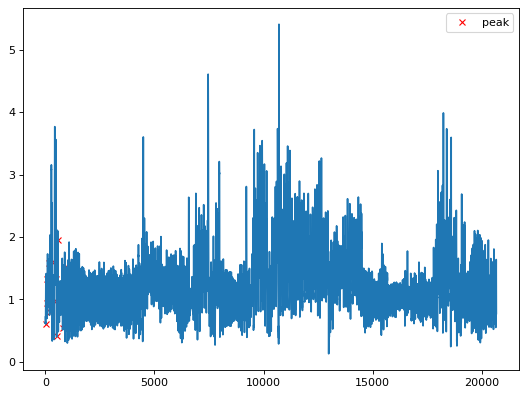

In [ ]:
from scipy import signal
from matplotlib.pyplot import figure
xs = np.arange(0, np.pi, 0.05)
data = data_36['magnitude'].values
# peakind = signal.find_peaks_cwt(data, np.arange(1,10))
peakind = signal.find_peaks_cwt(data, widths = np.arange(1,30) )  
figure(figsize=(8, 6), dpi=80)
plt.plot(peakind, x[peakind], "xr"); plt.plot(x); plt.legend(['peak'])
plt.show()